# What is Random Number
 A random number is one that is selected at random, as the name suggests, from a group of numbers. As they tend to be excessively slow for most applications in statistics and cryptography, the first methods for producing random numbers, such as dice, coin flipping, and roulette wheels, are still employed today, primarily in games and gambling.
 
**Who generated first random numbers?**

`John von Neuman gave idea to generate random numbers in 1946`. His plan was to square an initial random seed value, remove the middle digits, and continue. The sequence of integers that results after repeatedly squaring the result and removing the middle digits exhibits the statistical characteristics of randomness.

Consider any significant number, such as 2934; its square is 8608356; you choose 083 at random; its square is 6889; its next random number is 88 etc. As we need to select initially large number to generate random number.

# Main Characteristics of Random Number
Random number should have following desirable properties to become good random number,
* Random

Random numbers as we generated should be random it means there is no any pattern in data. Random number are generated without any rule.

* Reproducible 

Another important property of random number is reproducibility. It means we can generated new random number from previous one.

* Portable

Random number should be portable. It means it should be changeable.

* Efficient 

The random numbers we have generated should be efficient. It should produce desirable result. 



# Generating Random Number from Monte Carlo Method

Multiple sources of systematic and statistical mistakes can affect MC simulations. If our random number are poor quality as a result of which we get systematic error. The creation of random numbers and testing are still significant issues that haven't been fully resolved. As was already indicated, RN sequences are required for MC. should not repeat over very long periods and should be uniform, uncorrelated, and of a very long length.

Additionally, if we employ parallel computing (which is obviously necessary to handle massive amounts of data), we must ensure that every generated random number sequences are separate and uncorrelated (8N).

 # Generating Random Number using Congruential Method
 
The fundamental principle is that a seed is picked together with a fixed number, c, and that successive numbers are then produced by simple multiplication.

$$ X_n = (c * X_n-1 + a_0)MOD N_{max} $$

Where $X_n$ is an integer between 1 to $N_{max}$

Experience has shown that a good congruential 32 bit linear congruential i.e,

$$ X_n = (16807 * X_n-1 + a_0)MOD (2^{31}-1) $$

The number 16807 is called miracle number.


### Lets Generate Random numbers using Congruential Method by using python

## Algorithm
1. You need to produce random number from seed using above formula use following algorithm.
* Start
* For loop
* Define seed
* Start Loop
* Calculate ran = (16807*seed)%(2**31)
* Set seed equal to ran for the next iteration of the loop
* Print random number you generate 
* Increase count by 1
* stop



First import necessary module

In [2]:
import numpy as np
import matplotlib.pyplot as plt


We can choose seed value to any number but it should be larger number.  We set ran to `ran = (16807*seed)%(2**31)` and then seed is equal to ran value so that seed is change in each iterations.

In [3]:
seed = 10000
count = 0 
random1 = []
while count<100:
    ran = (16807*seed)%(2**31)
    seed = ran
    ran = ran
    random1.append(ran)
    count+=1
#print(random1)
    

    

Lets change above random number in the range [0,1)

In [4]:
L1  = [x/(2**31) for x in random1]

Lets generate another random number using different seed. Here we use same procedure except different seed value.

## Algorithm
* Start
* For loop
* Define seed
* Start Loop
* Calculate ran = (seed* 16807)/(2**31-1)
* Set seed equal to ran for the next iteration of the loop
* Print random number you generate 
* Increase count by 1
* stop

In [5]:
seed = 137474
count = 0 
random2 = []
while count<100:
    ran = (16807*seed)%(2**31)
    seed = ran
    ran = ran
    random2.append(ran)
    count+=1
#print(random1)
    

    

Change the above random number in the range [0,1)

In [6]:
L2 = [x/(2**31) for x in random2 ]

#### Plot of Two random number as we generated
We should check the randomness of the numbers we generated, so the scatter plot is the best choice. If the distribution of our scatter dotted points is uniform, we can get a random integer. However, we are unable to produce a perfect random number. We produce a pseudorandom number as the result of setting the seed value. The only sources of really random numbers are physical processes.

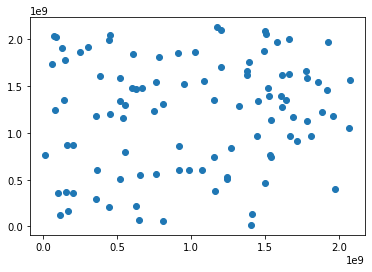

In [7]:
plt.scatter(random1,random2)
plt.show()

In the above plot, points are distributed nearly uniformly but not completely uniform. This happened because we generated a few numbers. If we increase the random number size, then what will happen? Let's check.

In [8]:
seed = 10000
count = 0 
random1 = []
while count<10000:
    ran = (16807*seed)%(2**31)
    seed = ran
    ran = ran
    random1.append(ran)
    count+=1
L1  = [x/(2**31) for x in random1]
    

    

In [9]:
seed = 137474
count = 0 
random2 = []
while count<10000:
    ran = (16807*seed)%(2**31)
    seed = ran
    ran = ran
    random2.append(ran)
    count+=1
L2 = [x/(2**31) for x in random2 ]
    

    

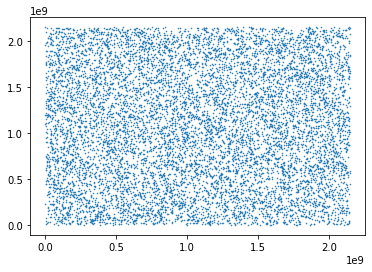

In [10]:
plt.scatter(random1,random2,s = 0.3)
plt.show()

Hence, as random number size increases, we can find that points are randomly distributed. Hence, we are able to build a pseudo random number.

#### Let's change given random number into Normal distribution

For this lets build new number from above numbers using following relation,
$$ y_1 = (-2\log(random1))^\frac{1}{2} cos(2\pi \times random2) $$

$$ y_2 = (-2\log(random1))^\frac{1}{2} sin(2\pi \times random2) $$


#### Using Python

#### Algorithm

* Start
* For loop
* Define seed
* Start Loop
* Calculate ran = (16807*seed2)%((2**31)-1)
* Set seed equal to ran for the next iteration of the loop
* Print random number you generate 
* Increase count by 1
* Normalize the random number we have created
* change the random number into array of number
* Use the formula $ y_1 = (-2\log(random1))^\frac{1}{2} cos(2\pi \times random2) $ and $ y_2 = (-2\log(random1))^\frac{1}{2} sin(2\pi \times random2) $
* Stop


In [11]:
arr1 = np.array(L1)
arr2 = np.array(L2)
ran_guss1 = ((-2*np.log(arr1)))**0.5 *np.cos(2*np.pi*arr2)
ran_guss2 = ((-2*np.log(arr1)))**0.5 *np.sin(2*np.pi*arr2)

#### Lets Check Distribution of generated new numbers

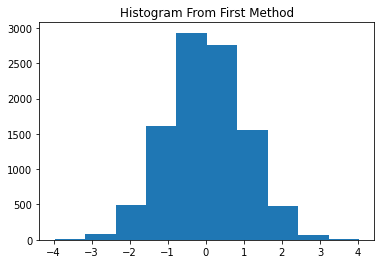

In [12]:
plt.hist(ran_guss1, bins= 10)
plt.title("Histogram From First Method")
plt.show()

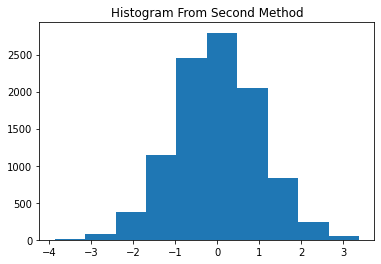

In [13]:
plt.hist(ran_guss2, bins= 10)
plt.title("Histogram From Second Method")
plt.show()

### Let us compare the random number generated from Congruential Method and Using Library 
Here, we generate random number from numpy `random.rand()` function which generate random number in the range [0,1).

In [14]:
ra = np.random.rand(10000)


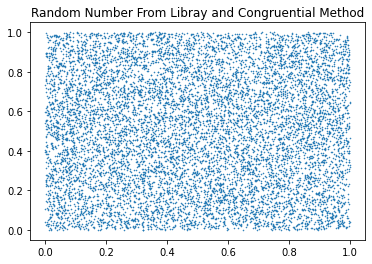

In [15]:
plt.scatter(L1, ra, s = 0.3)
plt.title("Random Number From Libray and Congruential Method")
plt.show()

# Auto Correlation

In [16]:
def correlation(arr, lag):
    arr = np.array(arr).flatten()
    arr1 = arr[:-lag]
    arr2 = arr[lag:]
    print(len(arr))
    print(len(arr1))
    print(len(arr2))
    print(np.corrcoef(arr1,arr2))
    #print(np.correlate(arr1,arr2))
correlation(L1,1)
    
   

10000
9999
9999
[[1.         0.01913928]
 [0.01913928 1.        ]]


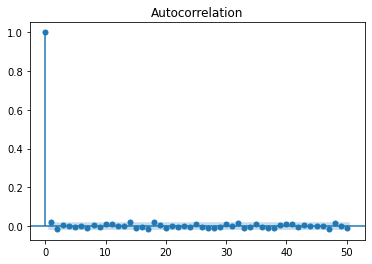

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(L1,lags=50)
plt.show()

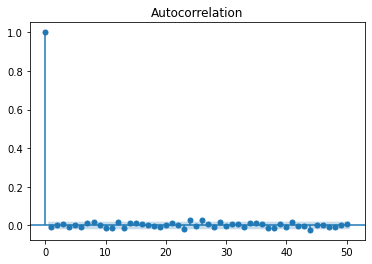

In [18]:
plot_acf(L2,lags=50)
plt.show()